In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
file_path = "Expt-7_time_series_covid19.csv"
df = pd.read_csv(file_path)

In [3]:
date_columns = df.columns[11:]

In [4]:
time_series = df[date_columns].sum(axis=0)

In [5]:
time_series.index = pd.to_datetime(time_series.index)

C:\Users\HP\AppData\Local\Temp\ipykernel_4604\400848821.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series.index = pd.to_datetime(time_series.index)


In [6]:
def plot_series(series, title="Time Series"):
    plt.figure(figsize=(12, 5))
    plt.plot(series, label="Total Cases")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.legend()
    plt.show()

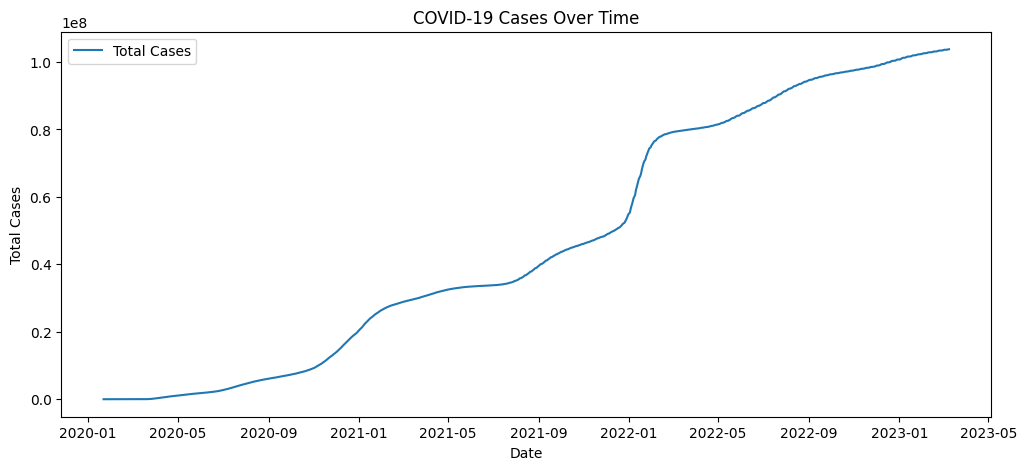

In [7]:
plot_series(time_series, title="COVID-19 Cases Over Time")

In [8]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Series is stationary")
    else:
        print("Series is NOT stationary")

In [9]:
adf_test(time_series)

ADF Statistic: -0.033379761771013754
p-value: 0.9556829980610129
Series is NOT stationary


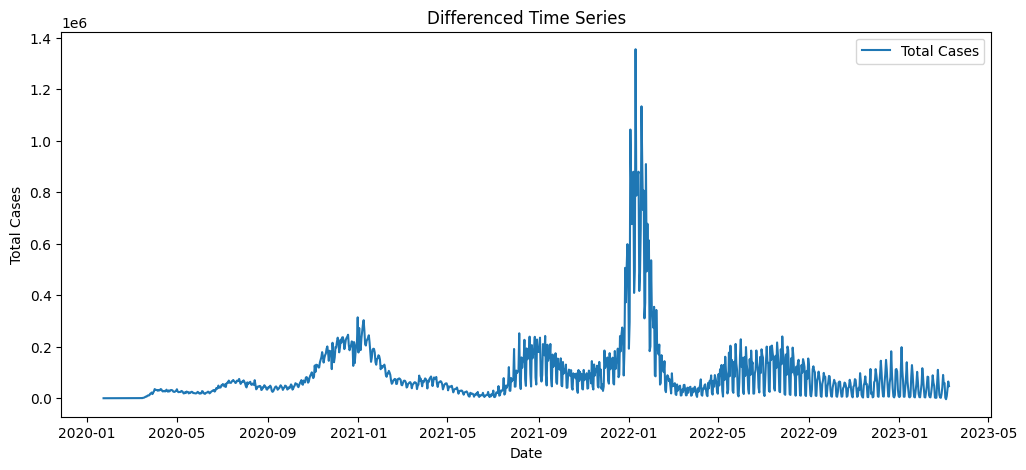

In [10]:
diff_series = time_series.diff().dropna()
plot_series(diff_series, title="Differenced Time Series")

In [11]:
adf_test(diff_series)

ADF Statistic: -4.326191879161948
p-value: 0.0004000393176799529
Series is stationary


In [12]:
def plot_acf_pacf(series):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    plot_acf(series, ax=ax[0])   # Identifies MA (q) component
    plot_pacf(series, ax=ax[1])  # Identifies AR (p) component
    plt.show()

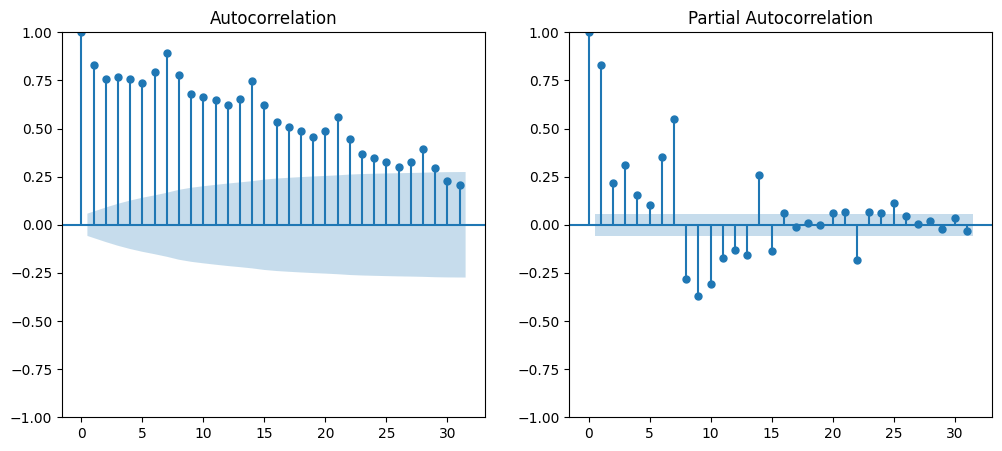

In [13]:
plot_acf_pacf(diff_series)

In [14]:
model = ARIMA(time_series, order=(2, 1, 2))
model_fit = model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1143
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14229.822
Date:                Mon, 21 Apr 2025   AIC                          28469.645
Time:                        20:29:43   BIC                          28494.847
Sample:                    01-22-2020   HQIC                         28479.161
                         - 03-09-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4788      0.033     14.525      0.000       0.414       0.543
ar.L2          0.5090      0.033     15.429      0.000       0.444       0.574
ma.L1         -0.0196      0.024     -0.816      0.4

In [16]:
forecast = model_fit.forecast(steps=30)

In [17]:
def plot_forecast(series, forecast):
    plt.figure(figsize=(12, 5))
    plt.plot(series, label="Actual Cases")
    plt.plot(pd.date_range(start=series.index[-1], periods=30, freq="D"), forecast, label="Forecast", color="red")
    plt.title("COVID-19 Cases Forecast")
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.legend()
    plt.show()

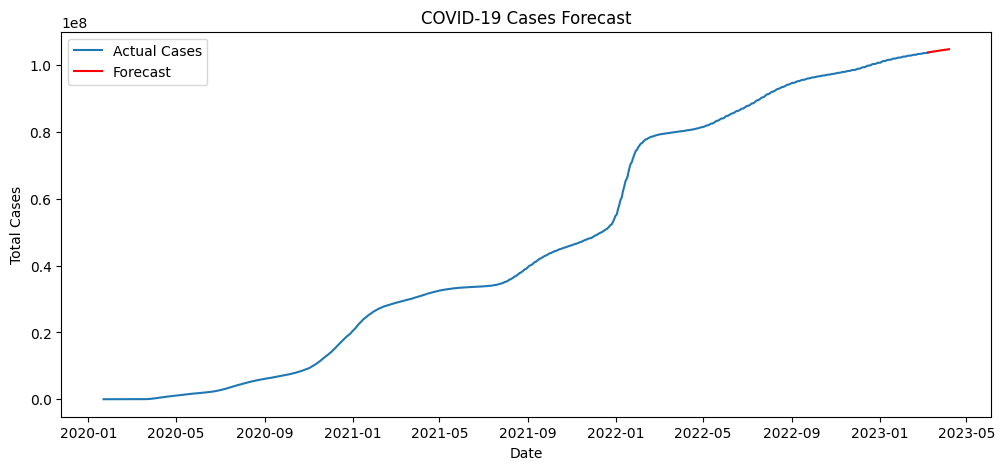

In [18]:
plot_forecast(time_series, forecast)